In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
import numpy as np
N = 100 #parameter responsible for number of points of grid
delta = 0.02
beta = 0.96
v_0 = np.array([1 for i in range(0, N)])
k = np.linspace(0.1, 1, N)

In [22]:
import math
def newV(k, k_p, v):
    return math.log(0.185 * (k** (1/3)) + (1 - delta) * k - k_p) + beta*v \
    if (0.185 * (k** (1/3)) + (1 - delta) * k - k_p) > 0 else float("-inf")

In [23]:
newV = np.vectorize(newV)

In [24]:
def max_of_value_function(capital):
    g = newV(capital, k, v_0[0])
    return np.array([max(g), np.argmax(g)])

In [25]:
v = v_0
while True:
    v = v_0[0]
    v_0 = np.array([[max_of_value_function(i)[0] for i in k], [max_of_value_function(i)[1] for i in k]])
    if max(abs(v - v_0[0])) < 10 ** -9:
        break

In [26]:
f = v_0[1].astype(int)
capital_path = [0.1]
i = 0
j = 0
T = 220 #time horizon
while j < T:
    capital_path.append(k[f[i]])
    i = f[i]
    j = j+ 1

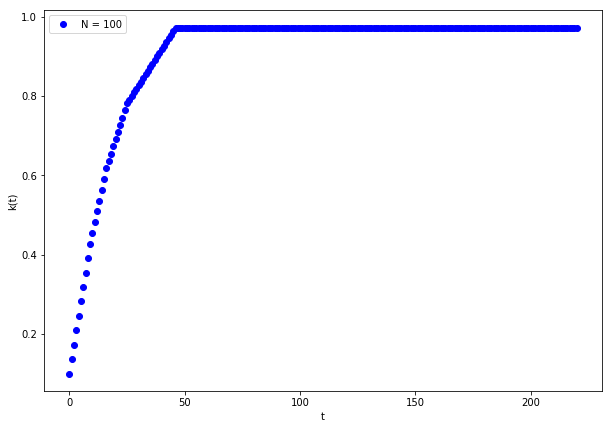

In [27]:
plt.rcParams['figure.figsize'] = [10, 7]
plt.plot(capital_path, 'bo', label='N = 100')
plt.xlabel('t')
plt.ylabel('k(t)')
plt.legend()

# Part below is about comparison with shooting algorithm

Shooting algorithm, copied from the previous home assignment:

In [8]:
k_1 = 0.1
k_steady = 1
T = 220
delta = 0.02
beta = 0.96

In [9]:
import numpy as np
k = np.zeros(T)
c = np.zeros(T)

In [10]:
def new_capital(k, c):
    return 0.185 * (k ** (1/3)) + (1 - delta)*k - c

In [11]:
def new_consumption(k, c):
    return beta *c*(1 - delta + (0.185 / (3*k**(2/3))))

In [12]:
k_low = k_1
k_up = new_capital(k_1, 0)
k_guess = [k_low]

In [13]:
j = 1
while True:
    k_guess.append((k_low + k_up) / 2)
    k[2] = k_guess[j] 
    c_1 = 0.185 * (k_1 ** (1/3)) + (1 - delta)*k_1 - k_guess[j]
    c[1] = c_1
    f = False
    for i in range(3, T):
        c_next = new_consumption(k[i-1], c[i-2])
        c[i-1] = c_next
        k_next = new_capital(k[i-1], c[i-1])
        k[i] = k_next
        if (k_next < k_1):
            f = True
            k_low = k[2]
            break
        if (k_next > k_steady):
            f = True
            k_up = k[2]
            break
    if (f == False):
        break
    if abs(k_guess[j] - k_guess[j-1]) < 10 ** (-15):
        break
    else:
        j = j + 1

In [14]:
k[2] = k_guess[len(k_guess) - 1] 
c_1 = 0.185 * (k_1 ** (1/3)) + (1 - delta)*k_1 - k_guess[len(k_guess) - 1]
c[1] = c_1
for i in range(3, T):
    c_next = new_consumption(k[i-1], c[i-2])
    c[i-1] = c_next
    k_next = max(new_capital(k[i-1], c[i-1]), k[i-1])
    k[i] = k_next

Value function iteration VS shooting algorithm

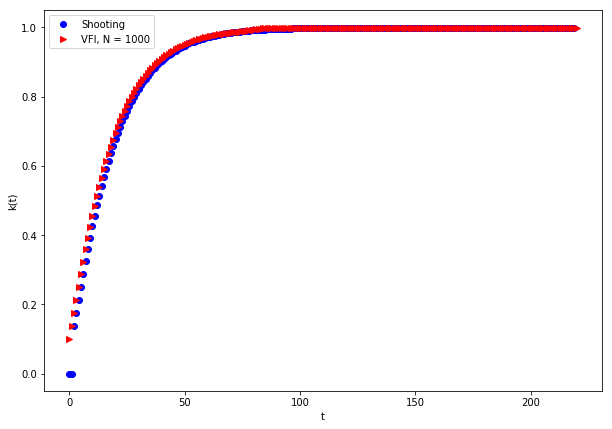

In [19]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 7]
plt.plot(k, 'bo', label = 'Shooting')
plt.plot(capital_path, 'ro', label = 'VFI, N = 100', marker=">")
plt.xlabel('t')
plt.ylabel('k(t)')
plt.legend()